# Predicting Heart Disease

## Introduction

The [World Health Organization (WHO)](https://www.who.int/health-topics/cardiovascular-diseases) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year. There are multiple risk factors that could contribute to CVD in an individual, and identifying these risk factors early on could help prevent many premature deaths.

An R&D company who is focusing on providing healthcare solutions, has collected anonymized data from multiple hospitals on several patients. We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

## Dataset

The [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

### Features' desciption

- `Age`: age of the patient [years]
- `Sex`: sex of the patient [M: Male, F: Female]
- `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- `RestingBP`: resting blood pressure [mm Hg]
- `Cholesterol`: serum cholesterol [mm/dl]
- `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
- `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
- `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
- `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- `HeartDisease`: output class [1: heart disease, 0: Normal]

## Exploratory Data Analysis

### Quick Review

In [1]:
import pandas as pd

dataset = pd.read_csv("heart_disease_prediction.csv")
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
print(f'(Observations, Features): {dataset.shape}')

(Observations, Features): (918, 12)


### Descriptive Statistics

From the quick review above, we can see that there are both  categorical and numerical features, and below shows that it's `5` v.s. `7`.

In [3]:
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Notably, two columns - `FastingBS` and `HeartDisease` - although having a data type of `int64`, they are categorical variables since they only take the values `0` and `1`.

Next, we will start by exploring and analyzing the numerical columns.

In [4]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From above table, few things caught my eyes:
- Patients are aged between 28 and 77, and the average age is around 53.
- `RestingBP` and `Cholesterol` have min value of `0`, which is unlikely to be happened for human being.
- There is no obvious missing value, since the count for all features are 918, but it's suspicious for item 2.

Furthermore, the median for `Cholesterol` is higher than its mean by roughly `25 mm/dl`, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.

### Domain Expertise

Although `RestingBP` and `Cholesterol` cant have a value of 0 by intuition, but we need some further resarch to support us.

`RestingBP` is the resting blood pressure, normal value is about 80 to 120, and the lower value you have, the lower your body's vital organs have the enough oxygen and nutrients. So, unlikely to have a `0` value for a human being.

As per the dataset description, `Cholesterol` contains the `serum cholesterol` values, and per the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean):
> `Serum Cholesterol` is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level.

So, since the `Cholesterol` is a combination of few stuff, it's unlikely to have a `0` value for a human being

### Visualizations

So far, we had some quick analysis on a subset of the features, but we don't know yet how the dataset is distributed in relation to our target variable -- `HeartDisease`. So, we'll now rely on creating visualizations to understand how the data is distributed.

In [5]:
# Calculate missing values in all columns to avoid any discrepancy on the visualization
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Now, we'll be creating a bar chart for all the categorical columns,  including `HeartDisease` and `FastingBS`.

#### Number of patients for each Features' category

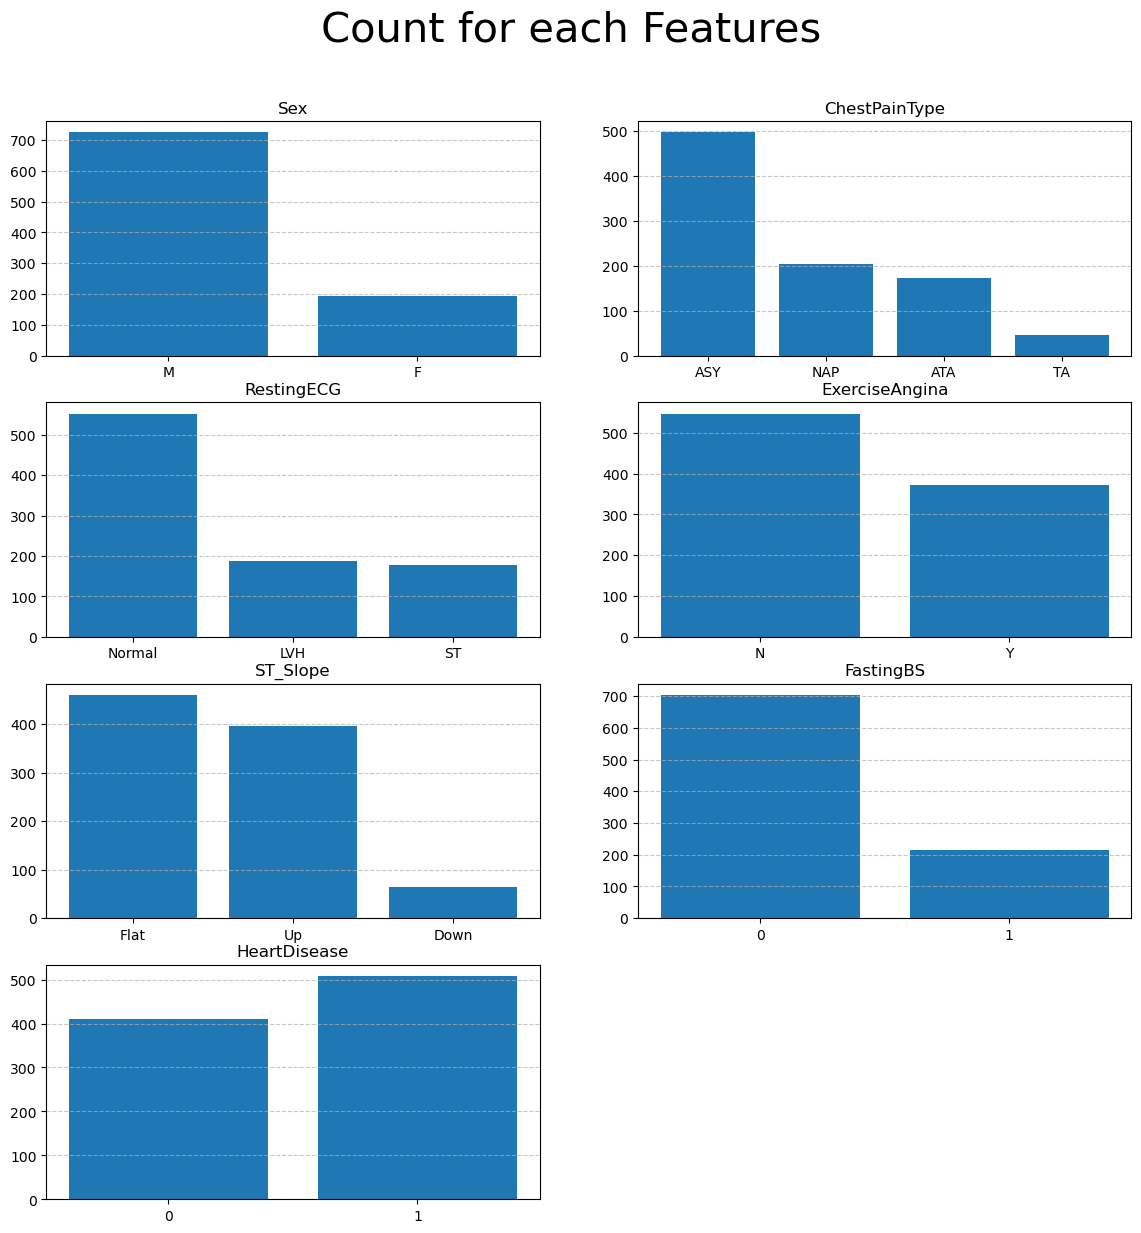

In [6]:
import matplotlib.pyplot as plt

col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']
plt.figure(figsize=(14, 14))
plt.suptitle('Count for each Features', fontsize=30, y=0.96)
for i, f in enumerate(col, start=1):
    plt.subplot(4, 2, i)
    plt.bar(dataset[f].value_counts().index, dataset[f].value_counts().values)
    plt.title(f)
    
    # Adjust X-ticks for numeric columns
    if f in ['FastingBS', 'HeartDisease']:
        plt.xticks([0, 1])
        
    # Add horizontal grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

Below are the some insights from the graph above:
- Most of the patients are male, which is aorund 7:2
- More than half of the patients have "ASY" (asymptomatic), and only a few (`<50`) have "TA" (Typical Angina). "NAP" and "ATA" shared the rest close to equally.
- More that half of the patients have "Normal" `RestingECG`, "ST" and "LVH" shared the rest almost equally.
- For `ST_Slope`, around half of the patients are 'Flat', follow by "Up", and only a few are "Down".
- Below is the ratio for the rest of the binary features (0:1 or N:Y)
    - `ExerciseAngina` - 5.5:3.5
    - `FastingBS` - 7:2
    - `HeartDisease` - 4:5

#### Number of patients for each Features' category - w/wo Heart Disease

Next, we'll do the similar but grouped by `HeartDisease`

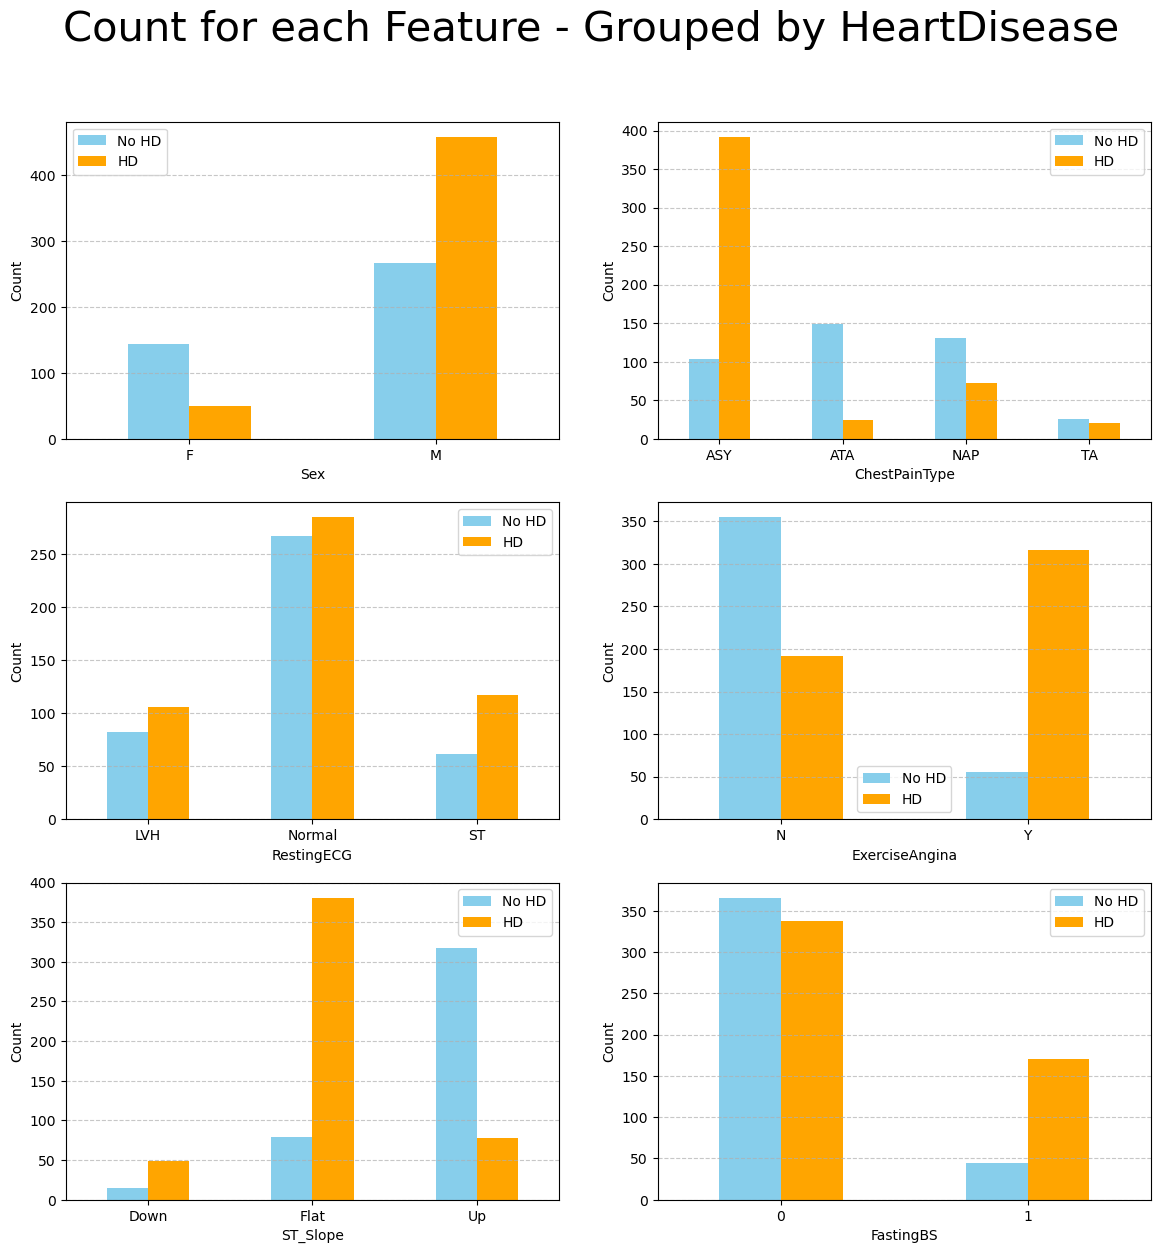

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
plt.figure(figsize=(14, 14))
plt.suptitle('Count for each Feature - Grouped by HeartDisease', fontsize=30, y=0.96)

for i, f in enumerate(col, start=1):
    plt.subplot(3, 2, i)
    
    # Group by HeartDisease and the feature, then count occurrences
    ## `unstack()` - similar to `pivot()`, but more specific to handling `MultiIndex`
    grouped_data = dataset.groupby([f, 'HeartDisease']).size().unstack()
    
    # Plot the bars, one for each HeartDisease group (0 and 1)
    ## `tacked=False` to appear side by side instead of stacked on top of each other
    ## `gca()` - "Get Current Axes", to ensure the plot is drawn in the correct subplot
    grouped_data.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], ax=plt.gca())
    
    # Add grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate X-ticks for better readability
    plt.xticks(rotation=0)
    
    # Add Y-axis label
    plt.ylabel('Count')
    
    # Add legend to indicate which color is for HeartDisease 0 and 1
    plt.legend(labels=['No HD', 'HD'], loc='best')

Below are the some observations from the bar plot above:
- Male has higher percantage to get heart disease.
- For `ChestPainType`, patients with "ASY" (asymptomatic) have the highest chance to get heart disease.
- For `RestingECG`, "LVH" and "Normal" are quite 50:50 to get the heart disease, while "ST" has about two-thirds to get heart disease.
- Patients that have angina while doing exercise are highly like to get the heart disease, while those without angina still have around one-thirds to get heart disease.
- Patients that have a flat or down `ST_slope` are easily to get the heart disease.
- If the `FastingBS` > 120 mg/dl, there is a very high chance to get the heart disease.

#### >50 y/o male patients

Since the mean of the patients' age is about 53 and most of the patients are male, let check also the portion of the heart disease patients that are male and over 50 years old

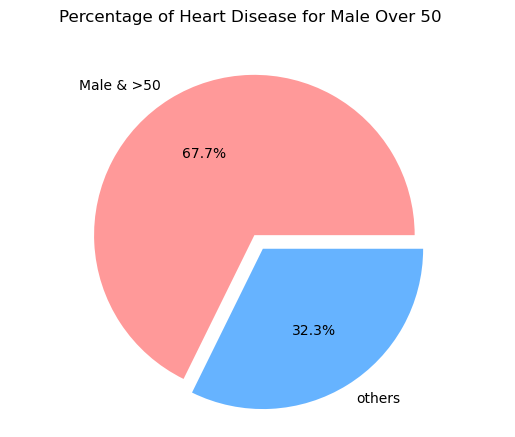

In [8]:
import matplotlib.pyplot as plt

# number for each criteria
hd = (dataset['HeartDisease'] == 1).sum()
hd_male_over50 = ((dataset['HeartDisease'] == 1) & (dataset['Sex'] == 'M') & (dataset['Age'] > 50)).sum()
percentage = 100*hd_male_over50/hd

# Data for the pie chart
labels = ['Male & >50', 'others']
sizes = [percentage, 100-percentage]
colors = ['#ff9999','#66b3ff']
explode = [0.1, 0]  # Explode the first slice (Portion 1)

# Create the pie chart
plt.pie(sizes, explode, labels, colors, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.suptitle('Percentage of Heart Disease for Male Over 50')
plt.show()

The above graph shows that approximately 68% of the patients with heart disease are male that has over 50 years old. This is a significant finding as it indicates that there may be a higher risk of developing heart disease in males over 50 years old.

#### Median Age for heart disease patients

Since we have a big range for the age in this dataset, around half century, we're also interesting to find out the median age of patients who were diagnosed with heart disease.

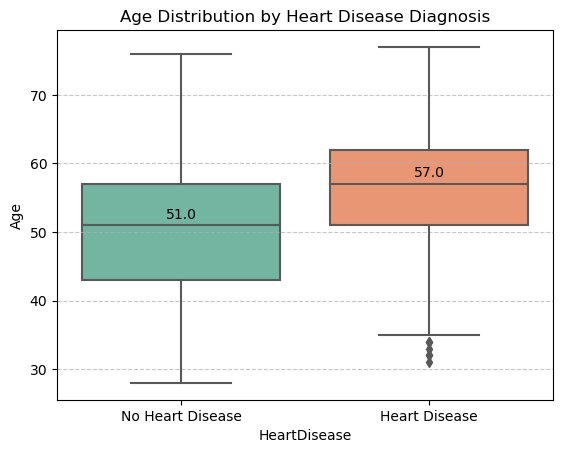

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the boxplot
## palette='Set2' - parameter to control the color scheme - one of the predefined color palettes
ax = sns.boxplot(data=dataset, x='HeartDisease', y='Age', palette='Set2')

# Amend the x-axis labels
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Age Distribution by Heart Disease Diagnosis')
plt.ylabel('Age')

# Add labels for min, max, and median
for i, group in enumerate([0, 1]):  # 0 for No Heart Disease, 1 for Heart Disease
    subset = dataset[dataset['HeartDisease'] == group]['Age']
    median_val = subset.median()
    
    ax.text(i, median_val+1, median_val, horizontalalignment='center', color='black', fontsize=10)

plt.show()

The boxplot above shows that the median age for patients without and with heart disease are 51 and 57, this may says that the elder the patient, the highr chance to get the heart disease.

## Data Cleansing

Before moving to the model traning, lets clean up the data. Although there is 'no' missing values, we noticed a couple of columns have 0 values that don't make sense.

There are a few ways we can handle these values:
- Easiest way: remove those rows entirely if their frequency of occurrence is low
- Impute those zeros with the median value of that column or the median value of the column grouped by `HeartDisease`
- Complex approaches: on top of idea 2, instead of using the median of the entire column, we could look at the median of the values grouped by the age, sex, and/or resting ECG of the patient. *For example,* the resting blood pressure of a female in her 30s with a normal ECG might be lower than what we would get from the median of the entire column.

The third option might give us a slightly more accurate result, but given the small size of our dataset, we can **ignore** it for now. We'll identify how many of these values exist in our dataset and approach accordingly.

In [10]:
print("Number of ZERO value for columns:")
print(f"`RestingBP` - {(dataset['RestingBP'] == 0).sum()}")
print(f"`Cholesterol` - {(dataset['Cholesterol'] == 0).sum()}")

Number of ZERO value for columns:
`RestingBP` - 1
`Cholesterol` - 172


Since the 1st item has only 1 zero value, we'll remove it; while the 2nd item has 172 zero values, which is close to 20% of our dataset, we'll use the 2nd approach then

In [11]:
# drop the line
index = dataset[dataset['RestingBP'] == 0].index
new_dataset_temp = dataset.drop(index=index)

cho_medial_ignore_zero = new_dataset_temp[new_dataset_temp['Cholesterol'] != 0].groupby('HeartDisease')['Cholesterol'].median()
print("Cholesterol median w/wo HD:")
print(cho_medial_ignore_zero)

new_dataset = new_dataset_temp.copy()

for index, row in new_dataset.iterrows():
    row_index = new_dataset['Cholesterol'] == 0
    if row['HeartDisease'] == 0:
        new_dataset.loc[row_index, 'Cholesterol'] = cho_medial_ignore_zero[row['HeartDisease']]
    else:
        new_dataset.loc[row_index, 'Cholesterol'] = cho_medial_ignore_zero[row['HeartDisease']]

Cholesterol median w/wo HD:
HeartDisease
0    231.5
1    246.0
Name: Cholesterol, dtype: float64


Quick check after the amendment above, the below output shows only 2 lines which is one-to-one manner, so should be fine.

In [12]:
zero_cholesterol_indices = new_dataset_temp[new_dataset_temp['Cholesterol'] == 0].index

original_zero_rows = new_dataset_temp.loc[zero_cholesterol_indices, ['HeartDisease', 'Cholesterol']]
updated_rows = new_dataset.loc[zero_cholesterol_indices, ['HeartDisease', 'Cholesterol']]

comparison = pd.concat([original_zero_rows, updated_rows], axis=1)
comparison.columns = ['HD (Original)', 'Cholesterol (Original)', 'HD (Updated)', 'Cholesterol (Updated)']

comparison.value_counts()

HD (Original)  Cholesterol (Original)  HD (Updated)  Cholesterol (Updated)
1              0                       1             231.5                    151
0              0                       0             231.5                     20
dtype: int64

## Modeling

### Feature Selection

Before selecting the features for our model, lets convert the categorical features into dummy variables, then also explore how the columns correlate to one another.

#### Categorical to dummy

We can directly apply the function `pd.get_dummies()` to our dataset, as it'll works only on the object-type columns and skip those numerical features.

In [13]:
new_dataset = pd.get_dummies(new_dataset, drop_first = True)

# quick review
new_dataset.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


#### Pearson's correlation

<AxesSubplot:>

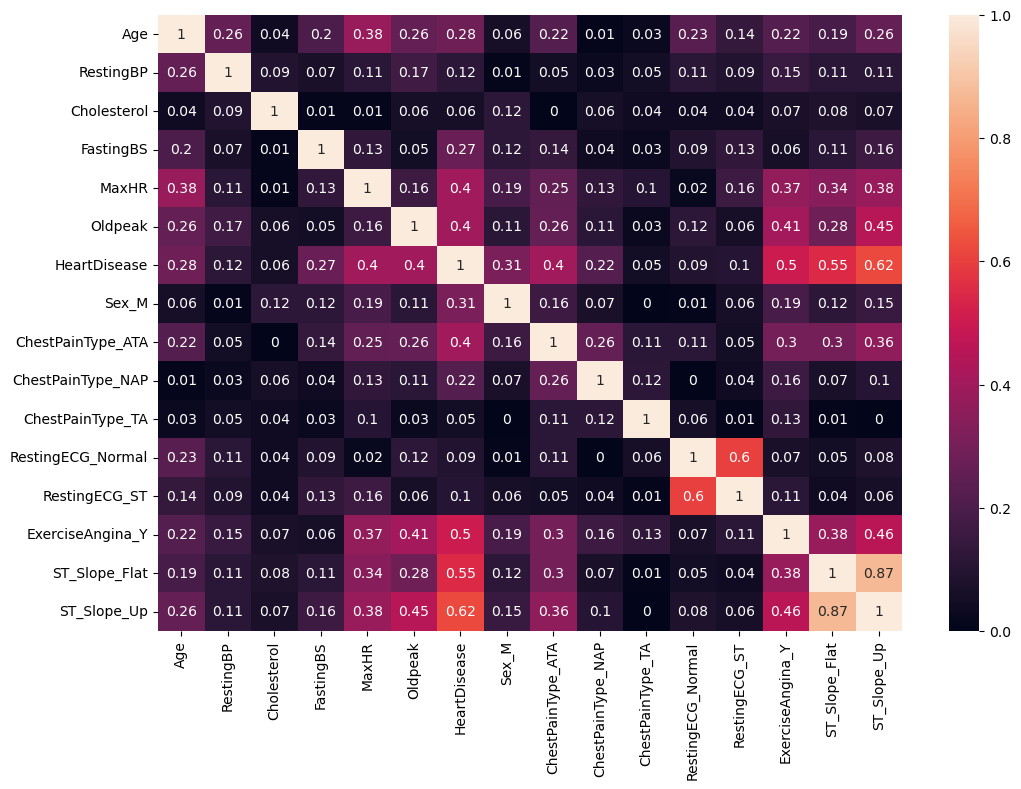

In [14]:
# use abs to narrow the value range, to get a better view on the heatmap
corr_dataset = abs(new_dataset.corr().round(2))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_dataset, annot=True)

Now we have a quick look for the correlations between the variables from the above graph. Lets choose those features that are reasonably correlated to `HeartDisease`.

In [15]:
print(corr_dataset['HeartDisease'].sort_values(ascending=False))

HeartDisease         1.00
ST_Slope_Up          0.62
ST_Slope_Flat        0.55
ExerciseAngina_Y     0.50
MaxHR                0.40
Oldpeak              0.40
ChestPainType_ATA    0.40
Sex_M                0.31
Age                  0.28
FastingBS            0.27
ChestPainType_NAP    0.22
RestingBP            0.12
RestingECG_ST        0.10
RestingECG_Normal    0.09
Cholesterol          0.06
ChestPainType_TA     0.05
Name: HeartDisease, dtype: float64


From the above sorting, we can see that the median value is `0.28` for the `Age`. Although the correlation value <0.4 is considered as weak, but from the previous chapters, we can easily group the heart disease patients from the `Sex_M` and `Age`.

Thus, we'll be selecting the below features. Bty, it's surprise that the `Cholesterol` is not strongly correlated to `HeartDisease`
- ST_Slope_Up
- ST_Slope_Flat
- ExerciseAngina_Y
- MaxHR
- Oldpeak
- ChestPainType_ATA
- Sex_M
- Age

### K-Nearest Neighbors

Now, we'll start using the K-NN algorithm for our modeling. Firstly, we need to split the dataset into training and validation sets. However, we do not know what is the best portion for the `test_size`, so we'll try for a few value and see the result (also for the `n_neighbors` later)

#### Single Features

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# split data into features target
X = new_dataset.drop('HeartDisease', axis=1)
y = new_dataset['HeartDisease']

# create list of selected features
features = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y',
            'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'Sex_M', 'Age']

# list of test sizes and number of neignhors to experiment with
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
n_neighbors = [2, 3, 4, 5]

# Initialize an empty list to store results
results = []

for test_size in test_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=99)
    
    for n_neighbor in n_neighbors:
        knn = KNeighborsClassifier(n_neighbor)
        
        for feature in features:
            # uses [[ because scikit-learn algorithm is expecting df with a single column as input
            knn.fit(X_train[[feature]], y_train)
            accuracy = knn.score(X_val[[feature]], y_val)
            round_acc = round(accuracy, 2)
            
            # save them to the list
            results.append({'test_size': test_size,
                            'n_neighbor': n_neighbor,
                            'feature': feature,
                            'accuracy': accuracy})

# Convert the results list into a DataFrame
df = pd.DataFrame(results)
df = df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

df

,test_size,n_neighbor,feature,accuracy
0,0.1,2,ST_Slope_Up,0.815217
1,0.1,3,ST_Slope_Up,0.815217
2,0.1,4,ST_Slope_Up,0.815217
3,0.1,5,ST_Slope_Up,0.815217
4,0.3,5,ST_Slope_Up,0.811594
...,...,...,...,...
155,0.3,2,Sex_M,0.463768
156,0.2,2,Sex_M,0.461957
157,0.3,4,Sex_M,0.362319
158,0.3,3,Sex_M,0.362319


We have now the accuracy for each combination of the `test_size`, `n_neighbor` and `feature` as above, we can quickly say that the "best model" is `test_size = 0.10` and `feature = ST_Slope_Up`, and `n_neighbor` seems doesnt matter for our model (within this range).

However, we do not know that if there is any bias to any single variable. To reduce it, let compute the mean and median of the accuracy value that groupby each category.

In [17]:
stats_test_size = df.groupby('test_size')['accuracy'].agg(['mean', 'median']).reset_index()

stats_n_neighbor = df.groupby('n_neighbor')['accuracy'].agg(['mean', 'median']).reset_index()

stats_feature = df.groupby('feature')['accuracy'].agg(['mean', 'median']).reset_index()

print("Statistics by test_size:")
print(stats_test_size)

print("\nStatistics by n_neighbor:")
print(stats_n_neighbor)

print("\nStatistics by feature:")
print(stats_feature)

Statistics by test_size:
   test_size      mean    median
0       0.10  0.655571  0.663043
1       0.15  0.659873  0.666667
2       0.20  0.698200  0.730978
3       0.25  0.606114  0.563043
4       0.30  0.625453  0.657609

Statistics by n_neighbor:
   n_neighbor      mean    median
0           2  0.596295  0.560870
1           3  0.660109  0.674819
2           4  0.663886  0.673913
3           5  0.675879  0.705435

Statistics by feature:
             feature      mean    median
0                Age  0.548587  0.547101
1  ChestPainType_ATA  0.635145  0.728261
2   ExerciseAngina_Y  0.645580  0.746377
3              MaxHR  0.639149  0.648551
4            Oldpeak  0.664348  0.677536
5      ST_Slope_Flat  0.751304  0.775362
6        ST_Slope_Up  0.786667  0.797101
7              Sex_M  0.521558  0.522826


From the above, `ST_Slope_Up` is still the feature that has the highest accuracy, but the `test_size` and `n_neighbor` changed to `0.2` and `5`.

Besides, take a closer look to the features ranking, it's kinda match the result from the correlation, which `ST_Slope` is the first and the `Age` & `Sex`are the lowest ranking. 

As a quick summary, the best model is the feature with `ST_Slope_Up`, test_size is `0.1` or `0.2` and n_neighbor is `5`.

#### Multiple Features

Lets now try to train all the selected features together and see if we can get a better result.

Firstly, we need to normalize as they arent within the same range. Besides, since we're going to train with all the features together, we'll refer to the highest accuracy from the average result, which `test_size` is `0.2` and `n_neighbor` is `5`.

In [18]:
from sklearn.preprocessing import MinMaxScaler

features = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y',
            'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'Sex_M', 'Age']

X_train, X_val, y_train, y_val = train_test_split(X[features], y, test_size=test_size, random_state=99)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

X_val_scaled = scaler.transform(X_val)
accuracy = knn.score(X_val_scaled, y_val)

print(f"Accuracy on val with n = 5: {accuracy*100:.2f}%")

Accuracy on val with n = 5: 85.14%


Wow, it's 85% now! Higher than any combination of model with single feature!! This may shows that a full body check is really important!!!

### Cross-Validation - `GridSearchCV`

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use `GridSearchCV` to search over those values.

Since we have to experiment with different value of test_sizes, we'll include together with the model evaluation.

In [28]:
from sklearn.model_selection import GridSearchCV
features = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y',
            'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'Sex_M', 'Age']
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]

final = []
for test_size in test_sizes:
    
    ## training
    scaler = MinMaxScaler()    
    X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=test_size, random_state=88)
    X_train_scaled = scaler.fit_transform(X_train)
    
    ## Hyperparameter Tuning
    knn = KNeighborsClassifier()
    grid_params = {"n_neighbors": range(1, 25),
                   "weights": ['uniform', 'distance'],
                   'metric': ['minkowski', 'manhattan']}
    knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')

    knn_grid.fit(X_train_scaled, y_train)
    best_score = knn_grid.best_score_
    best_params = knn_grid.best_params_
    
    ## Model Evaluation on Test Set
    X_test_scaled = scaler.transform(X_test)
    best_model = knn_grid.best_estimator_
    prediction = best_model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, prediction)
    
    # save them to the list
    final.append({'test_size': test_size,
                  'best_score': best_score,
                  'best_params': best_params,
                  'accuracy_on_test': accuracy})

# Convert the results list into a DataFrame
df = pd.DataFrame(final)

# split the component for better reading
params_df = pd.json_normalize(df['best_params'])
new_df = pd.concat([df.drop(columns=['best_params']), params_df], axis=1)

new_df

,test_size,best_score,accuracy_on_test,metric,n_neighbors,weights
0,0.10,0.846061,0.815217,minkowski,16,uniform
1,0.15,0.849801,0.833333,manhattan,15,uniform
2,0.20,0.849930,0.815217,minkowski,13,uniform
3,0.25,0.854469,0.821739,manhattan,22,uniform
4,0.30,0.864244,0.782609,minkowski,10,uniform


Some of best score are lower than the manual `knn.score`, but since `GridSearchCV` employs a cross-validation approach, it is reasonable to assume that this is a better estimation.

But, the overall accuracy on test set (across different test size) are lower than the best score, which may indicates that our model is overfitting.

However, we still can select the better one - the second - which accuracy is the closest to the best score. With that, it shows that the model has about 83% prediction correctly whether a patient is at risk for a heart disease.

#### Potential Explaination

One reason could explain for the overfitting is to look at how the data is distributed. We used `Sex` as one of our features for training the model.

In [30]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
1    724
0    193
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the training dataset
1    503
0    138
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the test dataset
1    221
0     55
Name: Sex_M, dtype: int64


We can see that the datasets have a significantly higher number of male patients than female, this imbalance could present a bias and potentially impacts our model. If the test dataset have a more balanced gender of patients, then it is understandable that the test set has better accuracy. Of course, there could be other factors contributing to this discrepancy.

# Moving Forward?

- Experiment with different parameters and hyperparameters.
    - Changing the `random_state` value might help?
- Explore and use different features to train your model.
    - What if use ALL the features in our dataset?
- Explore other algorithms that might perform better than k-NN.
- Try and collect more data.